In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('mobile_data.xlsx')

In [ ]:
df.head()


,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9


In [4]:
df.describe()

,Transaction ID,Day,Month,Year,Units Sold,Price Per Unit,Customer Age,Customer Ratings
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,1918.000000,15.703781,6.527249,2022.765319,4.993481,40114.036816,38.098305,3.693090
std,1107.213469,8.822771,3.452030,0.917401,2.581122,17310.488427,12.110622,1.325069
min,1.000000,1.000000,1.000000,2021.000000,1.000000,10011.110000,18.000000,1.000000
25%,959.500000,8.000000,4.000000,2022.000000,3.000000,25617.405000,27.500000,3.000000
50%,1918.000000,16.000000,7.000000,2023.000000,5.000000,40136.490000,38.000000,4.000000
75%,2876.500000,23.000000,10.000000,2024.000000,7.000000,54973.475000,49.000000,5.000000
max,3835.000000,31.000000,12.000000,2024.000000,9.000000,69984.480000,59.000000,5.000000


In [5]:
df.columns

Index(['Transaction ID', 'Day', 'Month', 'Year', 'Day Name', 'Brand',
       'Units Sold', 'Price Per Unit', 'Customer Name', 'Customer Age', 'City',
       'Payment Method', 'Customer Ratings', 'Mobile Model'],
      dtype='object')

In [6]:
df['Brand'].nunique()

5

In [7]:
df['City'].value_counts()

City
Delhi         1008
Mumbai         654
Ranchi         153
Hyderabad      138
Bangalore      136
Lucknow        130
Gorakhpur      130
Kolkata        129
Indore         129
Jodhpur        127
Rajkot         126
Chennai        125
Kanpur         125
Bhopal         124
Vadodara       123
Madurai        123
Ludhiana       120
Coimbatore     118
Patna          117
Name: count, dtype: int64

In [8]:
# Top 10 cities
df['City'].value_counts().head(10)

City
Delhi        1008
Mumbai        654
Ranchi        153
Hyderabad     138
Bangalore     136
Lucknow       130
Gorakhpur     130
Kolkata       129
Indore        129
Jodhpur       127
Name: count, dtype: int64

In [9]:
# Payment method used
df['Payment Method'].value_counts()

Payment Method
UPI            1011
Debit Card      948
Credit Card     947
Cash            929
Name: count, dtype: int64

In [10]:
# Average cutomer Age
df['Customer Age'].mean()

np.float64(38.09830508474576)

In [11]:
# Arraning mismatched data 
day_map = {
    'Sun': 'Sunday',
    'Mon': 'Monday',
    'Tue': 'Tuesday',
    'Wed': 'Wednesday',
    'Thu': 'Thursday',
    'Fri': 'Friday',
    'Sat': 'Saturday'
}
df['Day Name'] = df['Day Name'].replace(day_map)

In [12]:
# Top selling days
df['Day Name'].value_counts(ascending=False)

Day Name
Saturday     564
Friday       550
Monday       549
Sunday       547
Wednesday    544
Tuesday      541
Thursday     540
Name: count, dtype: int64

In [13]:
# Comparing weekdays and weekend unit solds
df['Day Type'] = df['Day Name'].isin(['Saturday', 'Sunday'])
df['Day Type']= df['Day Type'].replace({True:'weekend', False :'Weekday'})



In [14]:
sales=df.groupby('Day Type')['Units Sold'].sum()
sales

Day Type
Weekday    13619
weekend     5531
Name: Units Sold, dtype: int64

Text(0.5, 1.0, 'Weekday vs Weekend Sales')

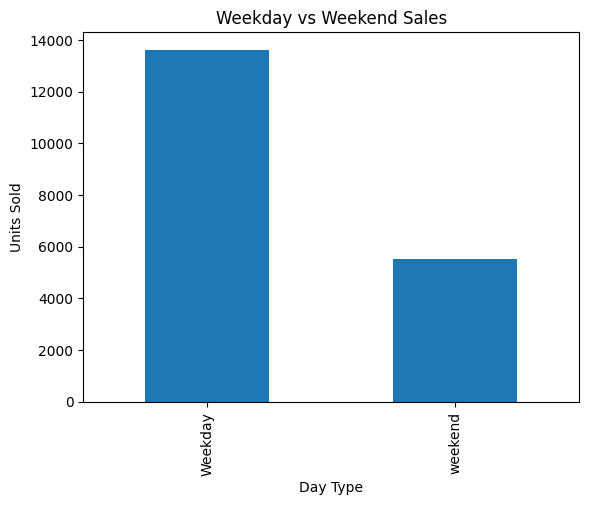

In [15]:
sales.plot(kind='bar')
plt.xlabel('Day Type')
plt.ylabel('Units Sold')
plt.title('Weekday vs Weekend Sales')

In [16]:
df.groupby('Brand')['Units Sold'].sum().reset_index()

,Brand,Units Sold
0,Apple,3932
1,OnePlus,3830
2,Samsung,3923
3,Vivo,3801
4,Xiaomi,3664


In [17]:
model_sales=df.groupby('Mobile Model')['Units Sold'].sum().reset_index()
model_sales

,Mobile Model,Units Sold
0,Galaxy A51,1236
1,Galaxy Note 20,1382
2,Galaxy S21,1305
3,Mi 11,1285
4,OnePlus 8T,1224
5,OnePlus 9,1197
6,OnePlus Nord,1409
7,Redmi 9,1128
8,Redmi Note 10,1251
9,Vivo S1,1135


In [18]:
payment_count = df['Payment Method'].value_counts().reset_index()
payment_count.columns = ['Payment Method', 'Number of Transactions']
payment_count

,Payment Method,Number of Transactions
0,UPI,1011
1,Debit Card,948
2,Credit Card,947
3,Cash,929


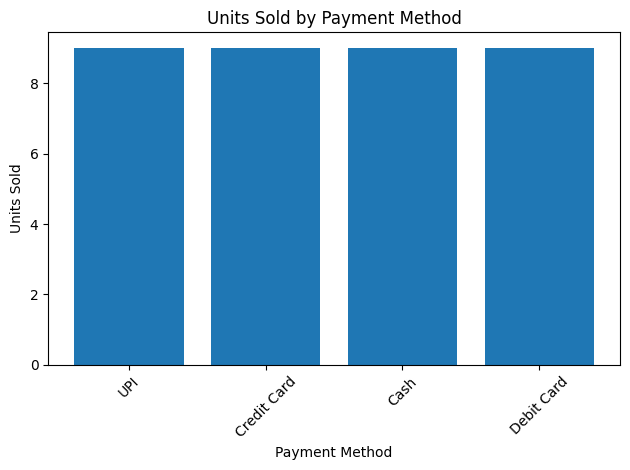

In [19]:
plt.figure()
plt.bar(df['Payment Method'],df['Units Sold'])
plt.xlabel('Payment Method')
plt.ylabel('Units Sold')
plt.title('Units Sold by Payment Method')
plt.xticks(rotation=45)
plt.tight_layout()



<Axes: ylabel='Units Sold'>

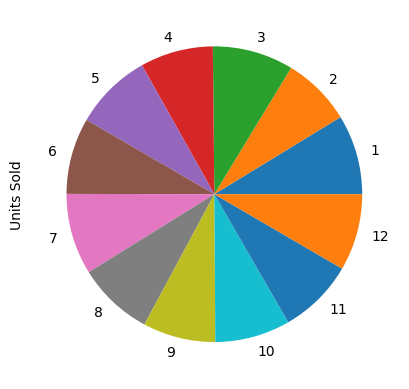

In [20]:
df.groupby('Month')['Units Sold'].sum().plot(kind='pie')